## Importing dependencies. 

In [126]:
import numpy as np
import pandas as pd
import zipfile
import os
import cv2
import matplotlib.pyplot as plt

In [127]:
path1 = os.listdir("Brain Tumor Dataset/Training")
path2 = os.listdir("Brain Tumor Dataset/Testing")

classes = {'glioma': 1,
           'meningioma': 2,
           'notumor': 3,
           'pituitary': 4
           }
X = []
y = []
for cls in classes:
    pth = "Brain Tumor Dataset/Training/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img,(512,512))
        X.append(img)
        y.append(classes[cls])

In [128]:
path1 = os.listdir("Brain Tumor Dataset/Training")
path2 = os.listdir("Brain Tumor Dataset/Testing")

classes = {'glioma': 1,
           'meningioma': 2,
           'notumor': 3,
           'pituitary': 4
           }
X_test = []
y_test = []
for cls in classes:
    pth = "Brain Tumor Dataset/Testing/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img,(512,512))
        img = img.flatten()
        X_test.append(img)
        y_test.append(classes[cls])

In [129]:
np.unique(y)

array([1, 2, 3, 4])

In [130]:
pd.Series(y).value_counts()

2    364
3    271
4    182
1    174
Name: count, dtype: int64

1


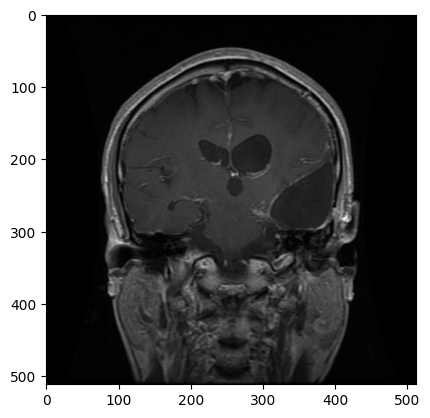

In [131]:
plt.imshow(X[1], cmap = 'gray')
print(y[1])

## Training Classifier model.

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
X_train = []
y_train = []
for cls in classes:
    pth = "Brain Tumor Dataset/Training/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img,(512,512))
        img = img.flatten()
        X_train.append(img)
        y_train.append(classes[cls])

In [134]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [135]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MAE: " ,mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))


Accuracy:  0.7194244604316546
MAE:  0.38848920863309355
MSE:  0.6187050359712231
